# This notebook only for data analysis and outliers detection

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
def load_data():
    print("---------------- Load Data------------")

    #df = pd.read_parquet("C://fuel_consumption/last_data/interpolated_train_mean.parquet")
    df = pd.read_parquet("C://fuel_consumption/last_data/TRAIN_CLEAN_v2.parquet")
    #df = pd.read_parquet("C://fuel_consumption/train_segments_w_fuel.parquet")
    df_sub = pd.read_parquet("C://fuel_consumption/fuel_rank_submission.parquet")
    df_sub_all = pd.read_parquet("C://fuel_consumption/last_data/TRAIN_SUB_v2.parquet")

    print("\nData shape",df.shape,df_sub_all.shape,df_sub.shape)

    return df, df_sub, df_sub_all

df, df_sub, df_sub_all = load_data()

---------------- Load Data------------

Data shape (131530, 36) (24289, 36) (24289, 5)


In [4]:
## Look at numerical features

In [7]:
df.columns

Index(['flight_id', 'typecode', 'source', 'fuel_kg', 'dev_start_s',
       'dev_end_s', 'wake', 'engine_type', 'engine_number',
       'total_flight_duration_s', 'takeoff', 'landing', 'segment_duration_s',
       'segment_start_time_s', 'segment_start_percentage', 'latitude_mean',
       'latitude_delta', 'longitude_mean', 'longitude_delta', 'altitude_mean',
       'altitude_delta', 'groundspeed_mean', 'groundspeed_delta', 'track_mean',
       'track_delta', 'vertical_rate_mean', 'vertical_rate_delta', 'mach_mean',
       'mach_delta', 'segment_gnd', 'segment_cl', 'segment_de', 'segment_lvl',
       'segment_cr', 'segment_na', 'flightphase_dominant'],
      dtype='object')

In [8]:
df.dtypes[df.dtypes!='object']

fuel_kg                            float64
dev_start_s                        float64
dev_end_s                          float64
total_flight_duration_s            float64
takeoff                     datetime64[us]
landing                     datetime64[us]
segment_duration_s                 float64
segment_start_time_s               float64
segment_start_percentage           float64
latitude_mean                      float64
latitude_delta                     float64
longitude_mean                     float64
longitude_delta                    float64
altitude_mean                      float64
altitude_delta                     float64
groundspeed_mean                   float64
groundspeed_delta                  float64
track_mean                         float64
track_delta                        float64
vertical_rate_mean                 float64
vertical_rate_delta                float64
mach_mean                          float64
mach_delta                         float64
segment_gnd

In [11]:
df.drop(["takeoff","landing"],axis=1, inplace=True)

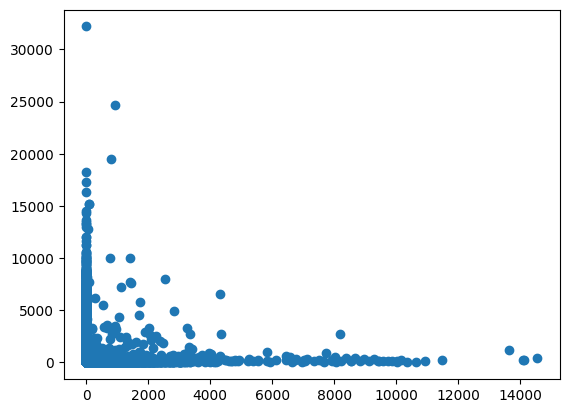

In [15]:
plt.scatter(x = "dev_start_s", y = "fuel_kg", data = df)

In [16]:
df.query("fuel_kg > 25000" )

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
94135,prc790175280,B744,acars,32205.032,0.0,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
## One potential outlier maybe 
## id = 94135, flight_id = prc790175280

In [17]:
df.query("dev_start_s > 12000" )

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
42542,prc777706732,B738,adsb,417.30464,14546.673999,14116.319999,M,J,2,13344.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL
42543,prc777706732,B738,adsb,217.72416,14116.319999,14088.218999,M,J,2,13344.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL
42544,prc777706732,B738,adsb,217.72416,14088.218999,13635.790999,M,J,2,13344.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL
42545,prc777706732,B738,adsb,1215.62656,13635.790999,11479.279999,M,J,2,13344.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL


In [18]:
## Look at thos: 42542, 42543, 42544, 42545

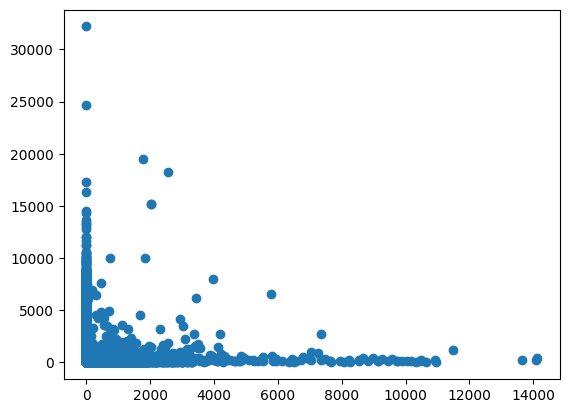

In [19]:
plt.scatter(x = "dev_end_s", y = "fuel_kg", data = df)

In [ ]:
#This feature is similar like the other one, we can remove it

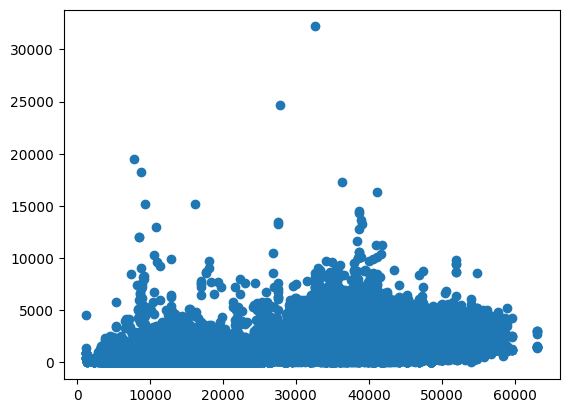

In [20]:
plt.scatter(x = "total_flight_duration_s", y = "fuel_kg", data = df)

In [22]:
df.query("fuel_kg > 25000" )

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
94135,prc790175280,B744,acars,32205.032,0.0,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
## Look at this one --> 94135

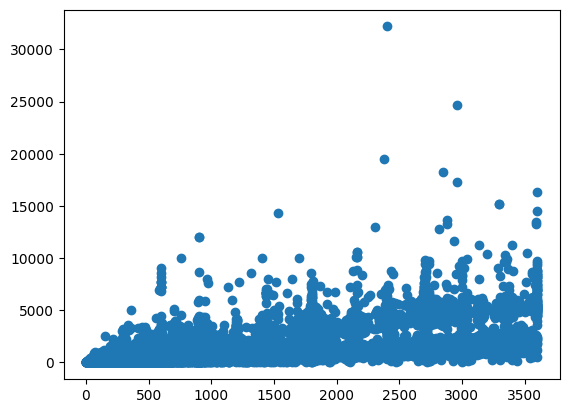

In [23]:
plt.scatter(x = "segment_duration_s", y = "fuel_kg", data = df)

In [ ]:
## It is obvious that we have one or two outliers here,

In [24]:
df.query("fuel_kg > 30000" )

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
94135,prc790175280,B744,acars,32205.032,0.0,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [25]:
### Carefully look at this 94135 --> flight: prc790175280


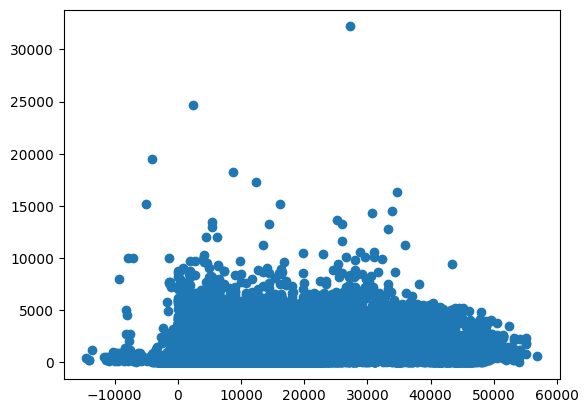

In [26]:
plt.scatter(x = "segment_start_time_s", y = "fuel_kg", data = df)

In [28]:
df.query("fuel_kg > 24000" )

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [29]:
## This feature is kinda the same as the one before, Look at the two samples : 15161 and  94135



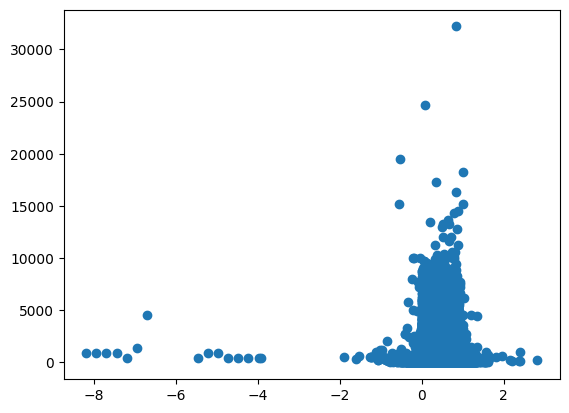

In [30]:
plt.scatter(x = "segment_start_percentage", y = "fuel_kg", data = df)

In [ ]:
## This feature is very bad , I think 

In [31]:
df.query("fuel_kg>30000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
94135,prc790175280,B744,acars,32205.032,0.0,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
#Look at this one: 94135



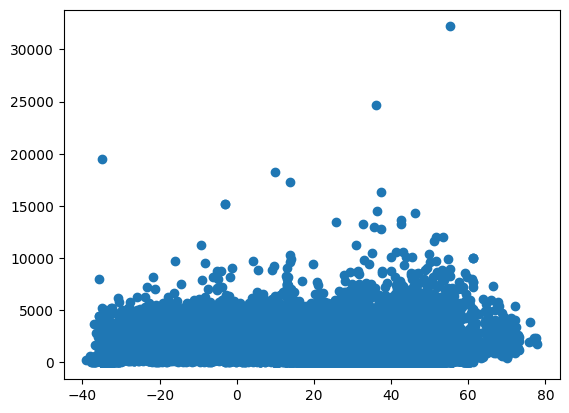

In [32]:
plt.scatter(x = "latitude_mean", y = "fuel_kg", data = df)

In [ ]:
### Hard to see any correlation with the target value

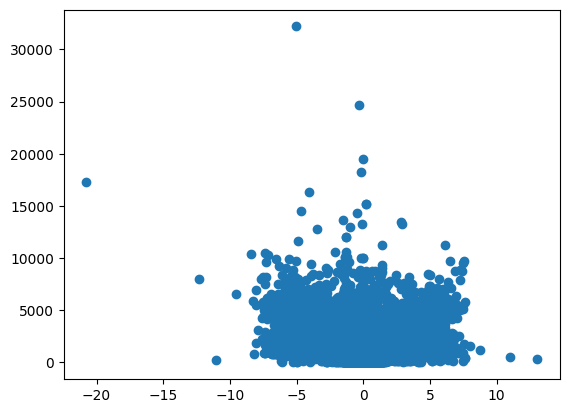

In [33]:
plt.scatter(x = "latitude_delta", y = "fuel_kg", data = df)

In [36]:
df.query("latitude_delta<-15 or fuel_kg>30000 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
31795,prc775954067,B789,acars,17299.99888,0.0,0.0,H,J,2,36336.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.03200,0.0,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
## Here some outliers:31795, 94135


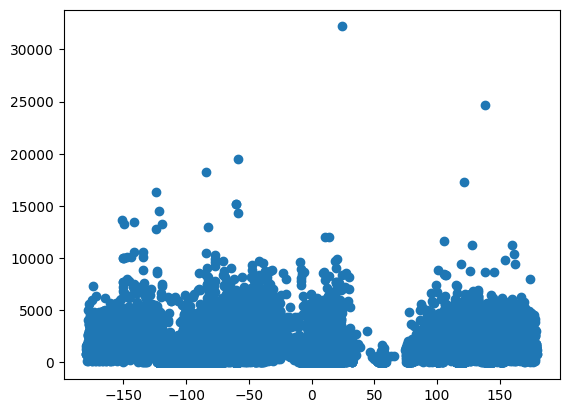

In [37]:
plt.scatter(x = "longitude_mean", y = "fuel_kg", data = df)

In [38]:
df.query("fuel_kg>24000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
### 15161, 94135



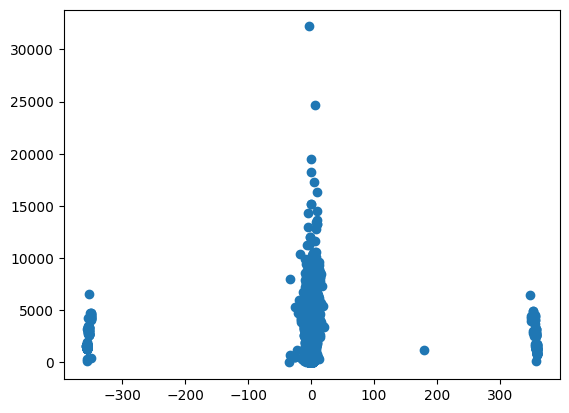

In [39]:
plt.scatter(x = "longitude_delta", y = "fuel_kg", data = df)

In [40]:
df.query("longitude_delta>100 and longitude_delta<200 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
3517,prc771278094,B737,adsb,1215.0,928.833999,0.0,M,J,2,23455.0,...,-1600.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL


In [ ]:
## Look at this : 3517



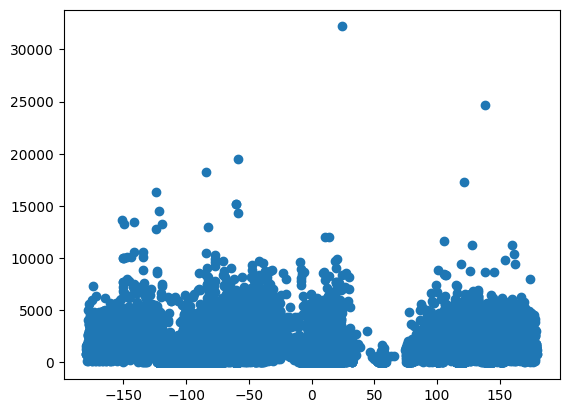

In [41]:
plt.scatter(x = "longitude_mean", y = "fuel_kg", data = df)

In [ ]:
### Here we can see many outliers

In [53]:
df.query("longitude_delta>0 and fuel_kg>18000 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.000,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
70282,prc783725065,A332,acars,19540.743360,800.399000,1766.423,H,J,2,7794.0,...,NaN,NaN,NaN,0.0,0.5,0.0,0.5,0.0,0.0,CL
82567,prc786592201,A332,acars,18280.664784,5.571000,2557.881,H,J,2,8724.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL


In [ ]:
#Look at these: 15161, 70282 and 82567



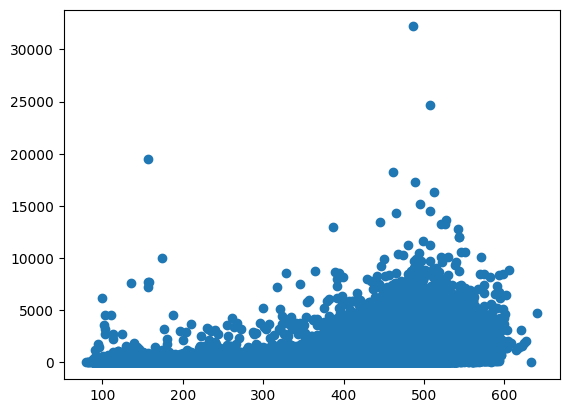

In [54]:
plt.scatter(x = "groundspeed_mean", y = "fuel_kg", data = df)

In [ ]:
# I can see three tliers here:

In [55]:
df.query("groundspeed_mean<200 and fuel_kg>18000 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
70282,prc783725065,A332,acars,19540.74336,800.399,1766.423,H,J,2,7794.0,...,NaN,NaN,NaN,0.0,0.5,0.0,0.5,0.0,0.0,CL


In [ ]:
#This is the first one: 70282



In [59]:
df.query("groundspeed_mean>450 and fuel_kg>19000 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
# These as well: 15161 and 94135



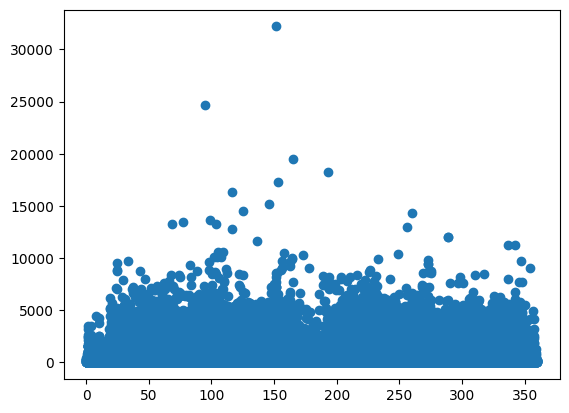

In [60]:
plt.scatter(x = "track_mean", y = "fuel_kg", data = df)

In [63]:
df.query("fuel_kg>20000 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [64]:
### Look at these: 15161, 94135



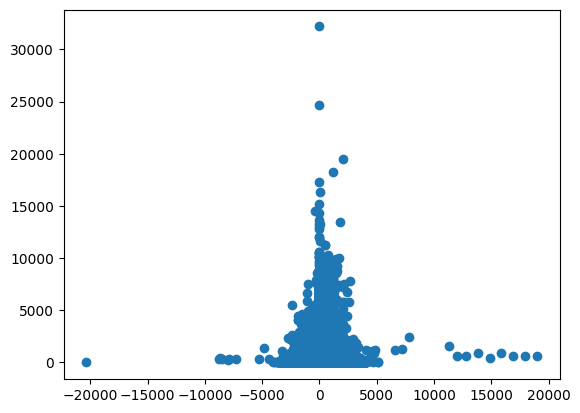

In [65]:
plt.scatter(x = "vertical_rate_mean", y = "fuel_kg", data = df)

In [67]:
df.query("vertical_rate_mean<-20000 or fuel_kg>19000 ")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.000,H,J,2,27816.0,...,0.00000,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
40461,prc777326263,A333,acars,45.359200,0.000000,0.000,H,J,2,45199.0,...,8390.76946,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,DE
70282,prc783725065,A332,acars,19540.743360,800.399000,1766.423,H,J,2,7794.0,...,NaN,NaN,NaN,0.0,0.5,0.0,0.5,0.0,0.0,CL
94135,prc790175280,B744,acars,32205.032000,0.000000,0.000,H,J,4,32640.0,...,0.00000,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [68]:
## Look at these: 15161, 40461,70282, 94135



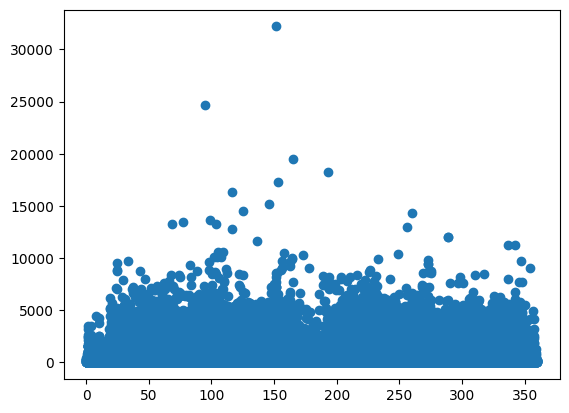

In [69]:
plt.scatter(x = "track_mean", y = "fuel_kg", data = df)

In [ ]:
#Same outliers if the fuel_kg

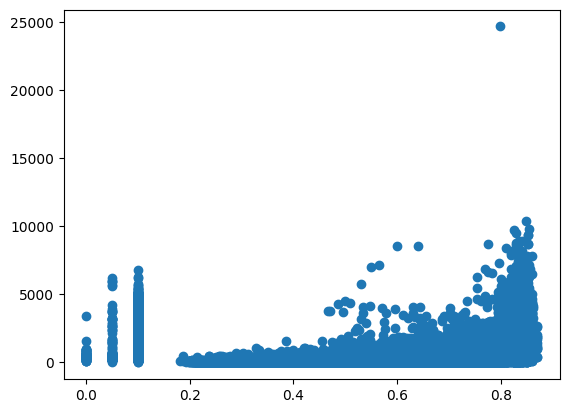

In [71]:
plt.scatter(x = "mach_mean", y = "fuel_kg", data = df)

In [ ]:
## I think it is not good idea to delet this feature

In [74]:
df.query("mach_mean< 0.2 and fuel_kg>5000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
4581,prc771428223,A359,acars,5400.0,0.000000,0.0,H,J,2,41491.0,...,0.000000,0.10,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,CR
6507,prc771772378,A359,acars,5100.0,0.000000,0.0,H,J,2,44320.0,...,-443.839557,0.10,0.0,0.0,0.200000,0.000000,0.0,0.800000,0.0,CR
6516,prc771772378,A359,acars,5600.0,0.000000,0.0,H,J,2,44320.0,...,0.000000,0.10,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,CR
9786,prc772292427,A359,acars,5200.0,0.000000,0.0,H,J,2,42777.0,...,-279.510348,0.10,0.0,0.0,0.500000,0.000000,0.0,0.500000,0.0,CL
10717,prc772441124,A359,acars,5100.0,0.000000,0.0,H,J,2,41859.0,...,-6.293682,0.10,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,CR
15735,prc773007147,A359,acars,5400.0,0.000000,0.0,H,J,2,48742.0,...,0.000000,0.10,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,CR
21357,prc773895387,A359,acars,6000.0,0.000000,0.0,H,J,2,29223.0,...,-2508.348793,0.05,0.1,0.0,0.874077,0.000000,0.0,0.125923,0.0,CL
25707,prc774777416,A359,acars,5200.0,0.000000,0.0,H,J,2,49812.0,...,0.000000,0.10,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,CR
26479,prc774872517,A359,acars,6200.0,0.000000,0.0,H,J,2,29886.0,...,-2240.000000,0.05,0.1,0.0,0.996199,0.000000,0.0,0.003801,0.0,CL
26578,prc774882629,A359,acars,5600.0,0.000000,0.0,H,J,2,31096.0,...,-2560.316680,0.05,0.1,0.0,0.946078,0.000000,0.0,0.053922,0.0,CL


In [73]:
df.mach_mean.unique()

array([0.86 , 0.725,   nan, ..., 0.793, 0.234, 0.48 ])

In [ ]:
### This feature needs carefull treatment

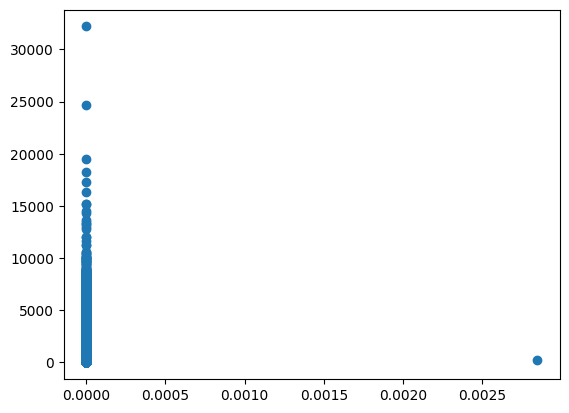

In [75]:
plt.scatter(x = "segment_gnd", y = "fuel_kg", data = df)

In [ ]:
## Two outliers here, 

In [80]:
df.query("segment_gnd>0 or fuel_kg>19900")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.000000,0.799,NaN,0.000000,0.0,0.000000,0.00000,1.0,0.000000,CR
42139,prc777608715,B738,acars,226.796000,0.000000,0.0,M,J,2,16015.0,...,564.218895,NaN,NaN,0.002846,0.0,0.565465,0.43074,0.0,0.000949,DE
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.00000,1.0,0.000000,CR


In [ ]:
# Consider this : 42139, 15161, 42139, 94135


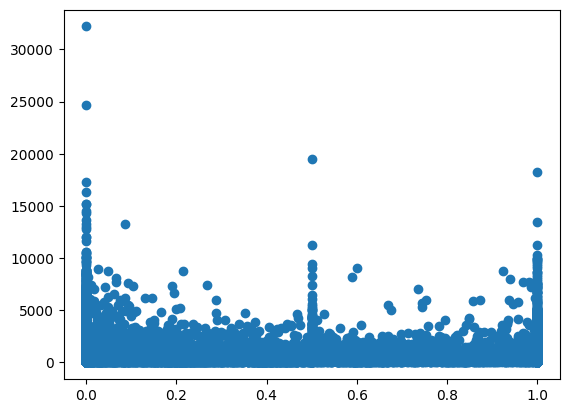

In [81]:
plt.scatter(x = "segment_cl", y = "fuel_kg", data = df)

In [82]:
#I can see 4 outliers, lets find them

In [84]:
df.query("segment_cl == 0.5 and fuel_kg> 19000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
70282,prc783725065,A332,acars,19540.74336,800.399,1766.423,H,J,2,7794.0,...,NaN,NaN,NaN,0.0,0.5,0.0,0.5,0.0,0.0,CL


In [ ]:
#Look at thes : 70282


In [85]:
df.query("segment_cl == 0 and fuel_kg> 25000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
94135,prc790175280,B744,acars,32205.032,0.0,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
#Look at thes : 94135

In [86]:
df.query("segment_cl == 1 and fuel_kg> 15000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
82567,prc786592201,A332,acars,18280.664784,5.571,2557.881,H,J,2,8724.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL


In [87]:
#Look at : 82567

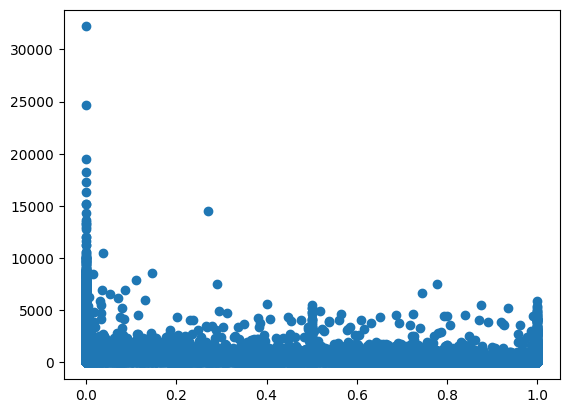

In [88]:
plt.scatter(x = "segment_de", y = "fuel_kg", data = df)

In [89]:
df.query("segment_de == 0 and fuel_kg> 20000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
#Look at these: 15161, 94135



In [90]:
df.query("segment_de >0.2 and fuel_kg> 12000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
44418,prc778062942,B77W,acars,14550.0,0.0,0.0,H,J,2,38605.0,...,-1664.0,NaN,NaN,0.0,0.0,0.269716,0.0,0.730284,0.0,CR


In [ ]:
## This one as well: 44418



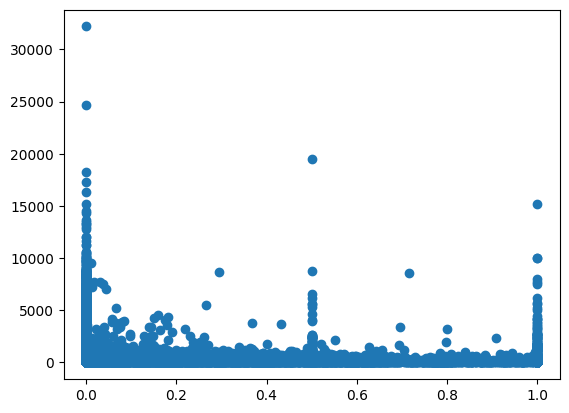

In [91]:
plt.scatter(x = "segment_lvl", y = "fuel_kg", data = df)

In [93]:
df.query("segment_lvl == 0.5 and fuel_kg>15000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
70282,prc783725065,A332,acars,19540.74336,800.399,1766.423,H,J,2,7794.0,...,NaN,NaN,NaN,0.0,0.5,0.0,0.5,0.0,0.0,CL


In [94]:
#This is as well: 70282



In [95]:
df.query("segment_lvl == 1 and fuel_kg>15000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
35540,prc776502511,A332,acars,15171.745216,80.195,2038.27,H,J,2,9232.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,LVL


In [96]:
## I would not say it is an outlier, but probably ---> 35540



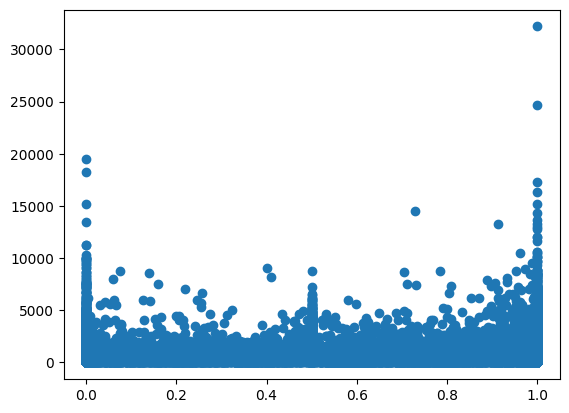

In [98]:
plt.scatter(x = "segment_cr", y = "fuel_kg", data = df) 

In [99]:
df.query("segment_lvl >0.7 and fuel_kg>13000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
35540,prc776502511,A332,acars,15171.745216,80.195,2038.27,H,J,2,9232.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,LVL


In [100]:
#Look at this : 35540



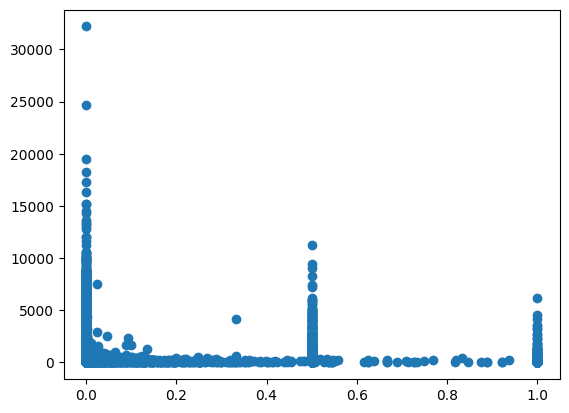

In [101]:
plt.scatter(x = "segment_na", y = "fuel_kg", data = df) 

In [103]:
df.query("(segment_na >0.3 and segment_na <0.4) and fuel_kg>4000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
12347,prc772635672,A359,acars,4127.6872,0.0,0.0,H,J,2,55625.0,...,0.0,0.8505,-0.001,0.0,0.0,0.0,0.0,0.666667,0.333333,CR


In [ ]:
#This one : 12347



## Create the final set of outliers on numerical features

In [130]:
outliers_list = [42542,82567,15161, 94135, 42543, 42544,70282, 42545, 94135,94135,94135,15161,94135, 94135,31795, 15161, 94135,3517,82567,
70282,15161,70282,94135,15161,40461,42139, 15161, 42139, 94135,44418,70282,35540,12347, 15161,42909, 42910, 50775,15161, 94135, 70282, 82567,35540]

In [131]:
outliers_list = list(set(outliers_list))

In [132]:
len(outliers_list)

18

In [133]:
outliers_list

[44418,
 50775,
 82567,
 12347,
 70282,
 40461,
 42542,
 42543,
 42544,
 42545,
 42909,
 31795,
 35540,
 94135,
 15161,
 42139,
 3517,
 42910]

## Let's look at outliers in the categorical features

In [113]:
df.dtypes[df.dtypes=='object']

flight_id               object
typecode                object
source                  object
wake                    object
engine_type             object
engine_number           object
flightphase_dominant    object
dtype: object

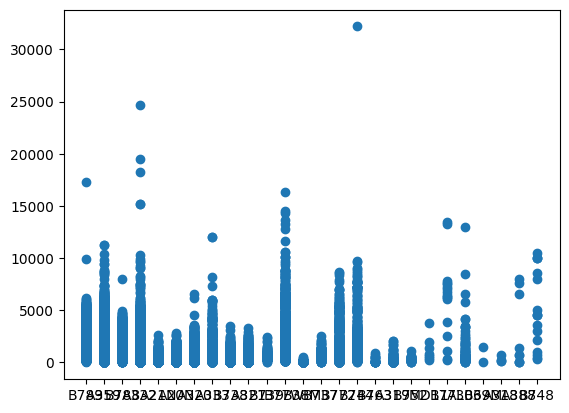

In [114]:
plt.scatter(x = "typecode", y = "fuel_kg", data = df) 

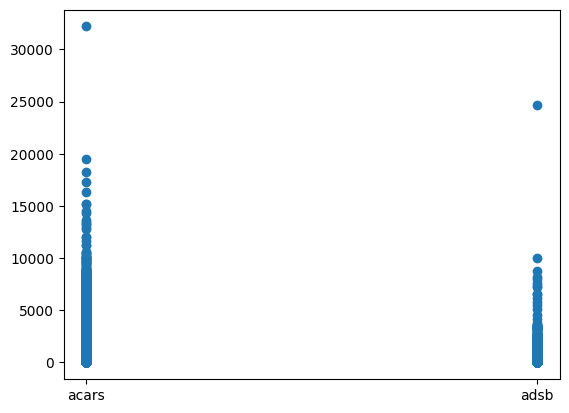

In [115]:
plt.scatter(x = "source", y = "fuel_kg", data = df) 

In [120]:
df.query("source == 'adsb' and fuel_kg>20000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
#This one : 15161

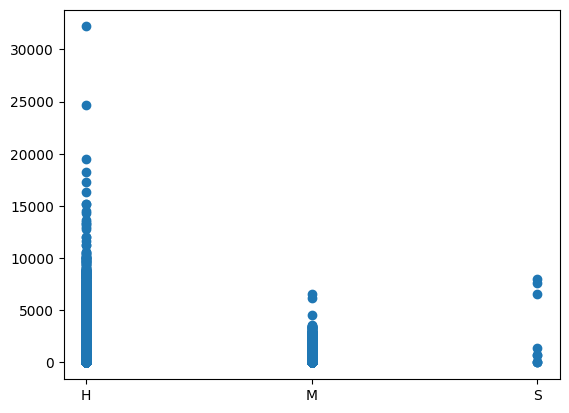

In [121]:
plt.scatter(x = "wake", y = "fuel_kg", data = df) 

In [122]:
df.query("wake=='S' and fuel_kg>5000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
42909,prc777789646,A388,adsb,8000.0000,2532.318000,3982.708000,S,J,4,22308.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
42910,prc777789646,A388,adsb,6600.0000,4322.137000,5791.768000,S,J,4,22308.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
50775,prc779305016,A388,adsb,7620.3456,1449.820999,471.968999,S,J,4,24396.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL


In [123]:
# These are outliers, but this time of Aircraft A388 is not in ranking ,42909, 42910, 50775



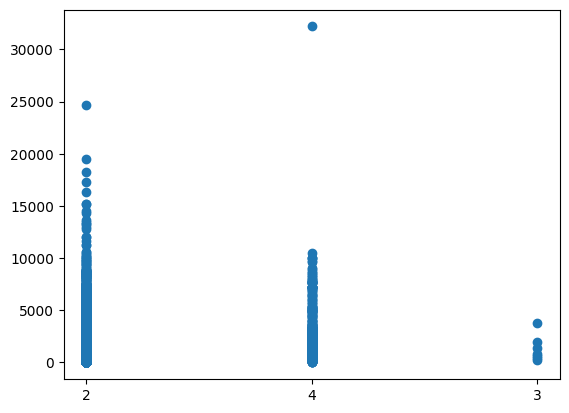

In [124]:
plt.scatter(x = "engine_number", y = "fuel_kg", data = df) 

In [ ]:
#Hard to say that it is an outlier, it dependes

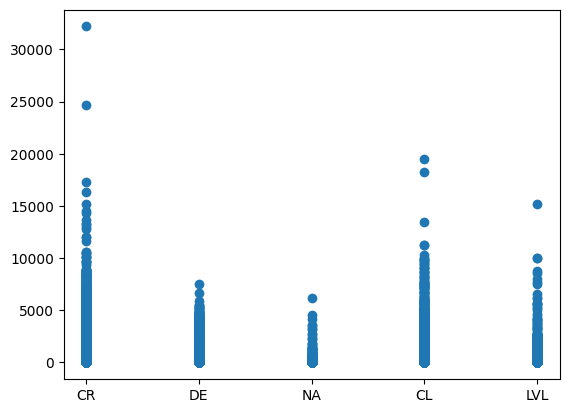

In [125]:
plt.scatter(x = "flightphase_dominant", y = "fuel_kg", data = df) 

In [126]:
df.query("flightphase_dominant=='CR' and fuel_kg>19000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
15161,prc772908176,A332,adsb,24694.002072,932.427999,0.0,H,J,2,27816.0,...,0.0,0.799,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR
94135,prc790175280,B744,acars,32205.032000,0.000000,0.0,H,J,4,32640.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,CR


In [ ]:
#outliers: 15161, 94135



In [127]:
df.query("flightphase_dominant=='CL' and fuel_kg>15000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
70282,prc783725065,A332,acars,19540.743360,800.399,1766.423,H,J,2,7794.0,...,NaN,NaN,NaN,0.0,0.5,0.0,0.5,0.0,0.0,CL
82567,prc786592201,A332,acars,18280.664784,5.571,2557.881,H,J,2,8724.0,...,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,CL


In [ ]:
# Outliers: 70282, 82567



In [128]:
df.query("flightphase_dominant=='LVL' and fuel_kg>10000")

,flight_id,typecode,source,fuel_kg,dev_start_s,dev_end_s,wake,engine_type,engine_number,total_flight_duration_s,...,vertical_rate_delta,mach_mean,mach_delta,segment_gnd,segment_cl,segment_de,segment_lvl,segment_cr,segment_na,flightphase_dominant
35540,prc776502511,A332,acars,15171.745216,80.195,2038.27,H,J,2,9232.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,LVL


In [ ]:
#Outlier: 35540
